In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import pytesseract as pyt
from pytesseract import Output

pyt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [2]:
img1 = cv.imread('./numbers.png')

text = pyt.image_to_string(img1, config='--psm 6')
text

'123456789\n'

In [3]:
img2 = cv.imread('./sentence.jfif', 0)

text = pyt.image_to_string(img2, config='--psm 6')
print(text)

Rome is not built in a day.
[Or or=orzoil
PtSOMAl= RO! OLICt.



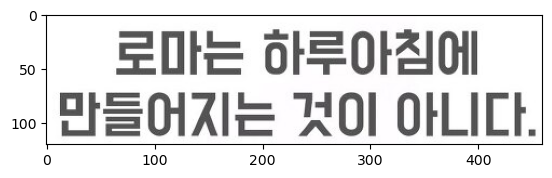

In [41]:
img3 = cv.imread('./sentence.jfif')

img3 = img3[400:520, 170:630]

plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))

In [44]:
text = pyt.image_to_string(img3, lang='kor')
print(text)

로마는 하루아침에
만들어지는 것이 아니다.



In [53]:
def getText(src):
    cv.imwrite('temp.png', src)
    text = pyt.image_to_string(Image.open('temp.png'), config='--psm 6', lang='kor+eng')
    print(text)

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7], 'left': [0, 13, 13, 65, 65, 113, 153, 205, 249, 289, 329, 369, 13, 13, 64, 106, 145, 184, 229, 326], 'top': [0, 14, 14, 14, 16, 10, 10, 14, 16, 16, 14, 16, 72, 72, 68, 68, 68, 68, 72, 72], 'width': [460, 441, 441, 335, 118, 40, 28, 35, 29, 32, 30, 31, 441, 199, 43, 40, 40, 30, 77, 128], 'height': [120, 99, 99, 42, 40, 64, 64, 42, 40, 40, 42, 40, 41, 41, 52, 52, 52, 52, 41, 41], 'conf': [-1, -1, -1, -1, 93, 92, 93, 93, 93, 75, 92, 80, -1, 19, 91, 91, 93, 96, 93, 89], 'text': ['', '', '', '', '로', '마', '는', '하', '루', '아', '침', '에', '', '만', '들', '어', '지'

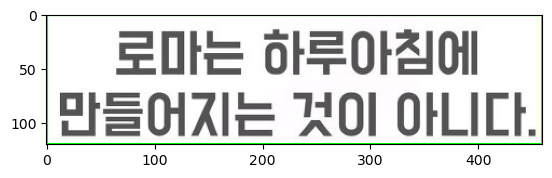

In [50]:
img3 = cv.imread('./sentence.jfif')

img3 = img3[400:520, 170:630]

plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))

results = pyt.image_to_data(img3, output_type=Output.DICT, lang='kor')
print(results)

for i in range(0, len(results['text'])):
    x, y, w, h = results['left'][i], results['top'][i], results['width'][i], results['height'][i]
    text = results['text'][i]
    
    if w > 400 and h > 100:
        cv.rectangle(img3, (x, y), (x+w, y+h), (0, 255, 0), 2)
        print(text)
        
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))

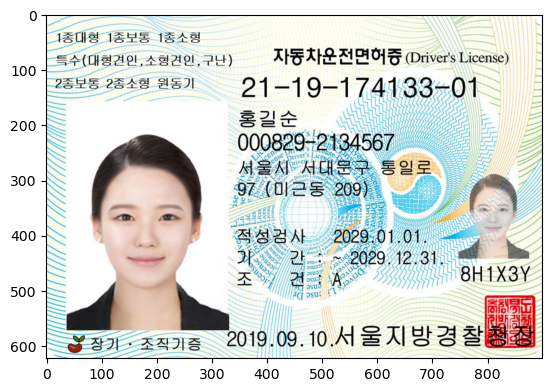

In [51]:
img = cv.imread('./drive.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

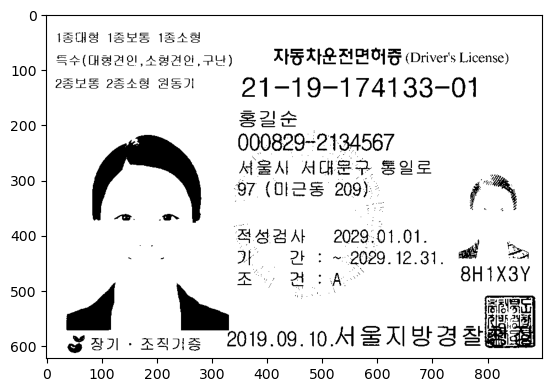

In [110]:
#img thresholding
img = cv.imread('./drive.jpg', 0)
_, img = cv.threshold(img, 110, 255, cv.THRESH_BINARY)

# erode
kernel = np.ones((1, 1), np.uint8)
img = cv.erode(img, kernel, iterations=1)

# dilate
kernel = np.ones((1, 1), np.uint8)
img = cv.dilate(img, kernel, iterations=1)


plt.imshow(img, cmap='gray')

In [111]:
getText(img)

1종대형 15'S 1종소형
득수(대형견인,소형견안,구난)   자동차운전면어증 (Driver's License)
2종모동 2종소형 원동기      21-19-174133-01
홍길순
000829-2134567
셔울시 서대문구 통일로    5
97 (미근동 209)        / ^
      적성검사 2029.01.01.      |
oe      가 간 : ~ 2000.12.31, a Be
Bee Ape       8BHIX3Y
i b>.
할 장기 sae 2019.09. 0M SAYA Sees



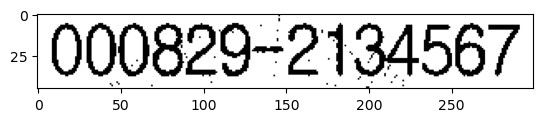

In [124]:
roi = img[210:255, 340:640]
plt.imshow(roi, cmap='gray')

{'level': [1, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1], 'left': [0, 9, 9, 9, 9], 'top': [0, 6, 6, 6, 6], 'width': [300, 283, 283, 283, 283], 'height': [45, 38, 38, 38, 38], 'conf': [-1, -1, -1, -1, 88], 'text': ['', '', '', '', '000829-2134567']}


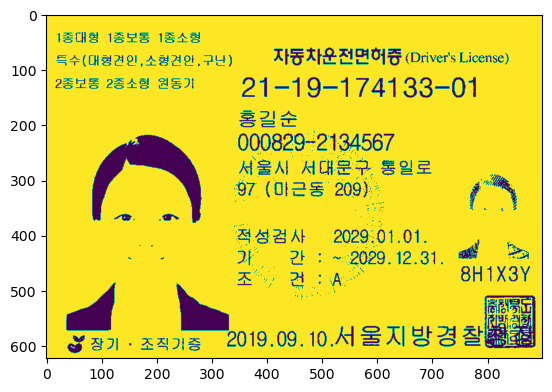

In [126]:
results = pyt.image_to_data(roi, output_type=Output.DICT, lang='kor')
print(results)

for i in range(0, len(results["text"])):
    # extract the bounding box coordinates of the text region from
    # the current result
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]
    # extract the OCR text itself along with the confidence of the
    # text localization
    text = results["text"][i]
    #conf = int(results["conf"][i])
    
    
    if w/h > 6 and w/h < 6.2 and text:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print(text, w, h)
    
plt.imshow(img)